# Import Library

In [ ]:
import pandas as pd
import cv2
import numpy as np
from numpy import asarray
import os
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dropout,Concatenate, Conv2DTranspose
from tensorflow.keras import Sequential, optimizers
from keras.callbacks import EarlyStopping

# Turn on GPU

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Mount to Google Drive

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [ ]:
path = os.path.join("../content/drive/My Drive/Colab Notebooks/Dataset/", "Embrio")

path_image = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(path,"Embryo","*"))}

path_imageenhance = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(path,"EmbryoEnhance","*"))}

path_imageflip = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(path,"EmbryoFlip","*"))}

path_imageflipenhance = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(path,"EmbryoFlipEnhance","*"))}

path_imagemask = {os.path.splitext(os.path.basename(x))[0]: x
                  for x in glob(os.path.join(path,"EmbryoMask","*"))}

path_imagemaskflip = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(path,"EmbryoMaskFlip","*"))}

In [ ]:
df = pd.read_csv("../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/Embryo.csv")

In [ ]:
df.head()

,id,label
0,Amirah_1(atas)-2-1.jpg,train
1,Amirah_1-2.jpg,train
2,Amirah_1-x-1.jpg,train
3,Anggi_1.jpg,train
4,Anggi_1-2-1.jpg,train


In [ ]:
for i in range(len(df)):
  df['id'][i] = df['id'][i].replace('.jpg','')

Get Path Image

In [ ]:
df['path_image'] = df['id'].map(path_image.get)
df['path_imageenhance'] = df['id'].map(path_imageenhance.get)
df['path_imageflip'] = df['id'].map(path_imageflip.get)
df['path_imageflipenhance'] = df['id'].map(path_imageflipenhance.get)
df['path_imagemask'] = df['id'].map(path_imagemask.get)
df['path_imagemaskflip'] = df['id'].map(path_imagemaskflip.get)

Set Image Size

In [ ]:
IMG_HEIGHT = 512
IMG_WIDTH = 512
IMG_CHANNELS = 3

In [ ]:
x_train = []
x_train_enhance = []
x_train_flip = []
x_train_flip_enhance = []
y_train = []
y_train_flip = []
x_val = []
x_val_enhance = []
x_val_flip = []
x_val_flip_enhance = []
y_val = []
y_val_flip = []
for i in range(len(df)):
  if df['label'][i]=='train':
    imgX = cv2.imread(df['path_image'][i])
    imgX = cv2.resize(imgX,(IMG_WIDTH,IMG_HEIGHT))
    x_train.append(imgX)
    # imgXE = cv2.imread(df['path_imageenhance'][i])
    # imgXE = cv2.resize(imgXE,(IMG_WIDTH,IMG_HEIGHT))
    # x_train_enhance.append(imgXE)
    # imgXF = cv2.imread(df['path_imageflip'][i])
    # imgXF = cv2.resize(imgXF,(IMG_WIDTH,IMG_HEIGHT))
    # x_train_flip.append(imgXF)
    # imgXFE = cv2.imread(df['path_imageflipenhance'][i])
    # imgXFE = cv2.resize(imgXFE,(IMG_WIDTH,IMG_HEIGHT))
    # x_train_flip_enhance.append(imgXFE)
    imgY = cv2.imread(df['path_imagemask'][i])
    imgY = cv2.resize(imgY,(IMG_WIDTH,IMG_HEIGHT))
    imgY = cv2.cvtColor(imgY, cv2.COLOR_BGR2GRAY)
    y_train.append(imgY)
    # imgYF = cv2.imread(df['path_imagemaskflip'][i])
    # imgYF = cv2.resize(imgYF,(IMG_WIDTH,IMG_HEIGHT))
    # imgYF = cv2.cvtColor(imgYF, cv2.COLOR_BGR2GRAY)
    # y_train_flip.append(imgYF)
  elif df['label'][i]=='val':
    imgX = cv2.imread(df['path_image'][i])
    imgX = cv2.resize(imgX,(IMG_WIDTH,IMG_HEIGHT))
    x_val.append(imgX)
    # imgXE = cv2.imread(df['path_imageenhance'][i])
    # imgXE = cv2.resize(imgXE,(IMG_WIDTH,IMG_HEIGHT))
    # x_val_enhance.append(imgXE)
    # imgXF = cv2.imread(df['path_imageflip'][i])
    # imgXF = cv2.resize(imgXF,(IMG_WIDTH,IMG_HEIGHT))
    # x_val_flip.append(imgXF)
    # imgXFE = cv2.imread(df['path_imageflipenhance'][i])
    # imgXFE = cv2.resize(imgXFE,(IMG_WIDTH,IMG_HEIGHT))
    # x_val_flip_enhance.append(imgXFE)
    imgY = cv2.imread(df['path_imagemask'][i])
    imgY = cv2.resize(imgY,(IMG_WIDTH,IMG_HEIGHT))
    imgY = cv2.cvtColor(imgY, cv2.COLOR_BGR2GRAY)
    y_val.append(imgY)
    # imgYF = cv2.imread(df['path_imagemaskflip'][i])
    # imgYF = cv2.resize(imgYF,(IMG_WIDTH,IMG_HEIGHT))
    # imgYF = cv2.cvtColor(imgYF, cv2.COLOR_BGR2GRAY)
    # y_val_flip.append(imgYF)

In [ ]:
x_train = np.asarray(x_train)
x_train = x_train/255
# x_train_enhance = np.asarray(x_train_enhance)
# x_train_enhance = x_train_enhance/255
# x_train_flip = np.asarray(x_train_flip)
# x_train_flip = x_train_flip/255
# x_train_flip_enhance = np.asarray(x_train_flip_enhance)
# x_train_flip_enhance = x_train_flip_enhance/255
y_train = np.asarray(y_train)
y_train = y_train/255
# y_train_flip = np.asarray(y_train_flip)
# y_train_flip = y_train_flip/255
x_val = np.asarray(x_val)
x_val = x_val/255
# x_val_enhance = np.asarray(x_val_enhance)
# x_val_enhance = x_val_enhance/255
# x_val_flip = np.asarray(x_val_flip)
# x_val_flip = x_val_flip/255
# x_val_flip_enhance = np.asarray(x_val_flip_enhance)
# x_val_flip_enhance = x_val_flip_enhance/255
y_val = np.asarray(y_val)
y_val = y_val/255
# y_val_flip = np.asarray(y_val_flip)
# y_val_flip = y_val_flip/255

In [ ]:
y_train = np.where(y_train>0,1,0)
# y_train_flip = np.where(y_train_flip>0,1,0)
y_val = np.where(y_val>0,1,0)
# y_val_flip = np.where(y_val_flip>0,1,0)

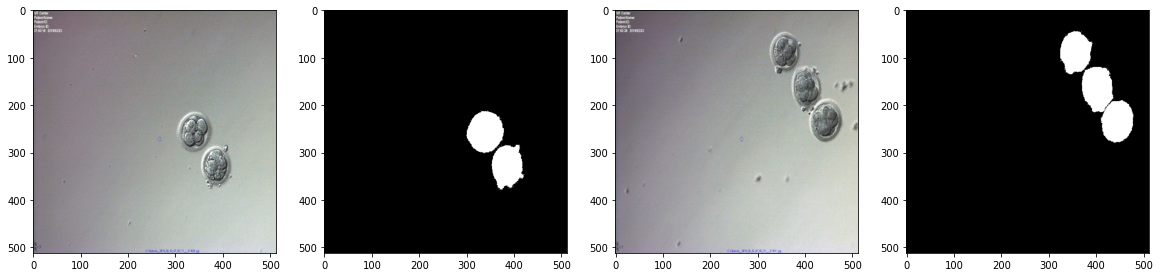

In [ ]:
n=4
fig_width = 5*n
fig_height = 5*2
fig, ax = plt.subplots(1, n)
fig. set_figwidth(fig_width)
fig. set_figheight(fig_height)

ax[0].imshow(x_train[1])
ax[1].imshow(y_train[1],cmap='gray')
ax[2].imshow(x_train[2])
ax[3].imshow(y_train[2],cmap='gray')

# ax[0,0].imshow(x_train[1])
# ax[0,1].imshow(y_train[1],cmap='gray')
# ax[0,2].imshow(x_train_enhance[1])
# ax[0,3].imshow(y_train[1],cmap='gray')
# ax[1,0].imshow(x_train_flip[1])
# ax[1,1].imshow(y_train_flip[1],cmap='gray')
# ax[1,2].imshow(x_train_flip_enhance[1])
# ax[1,3].imshow(y_train_flip[1],cmap='gray')

# Import Model U-Net

In [ ]:
# Build model
inputs = tf.keras.layers.Input(shape=(IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
print("Input layer = ", inputs.shape,"\n")

# Encoder
C1 = Conv2D(16, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(inputs)
C1 = Conv2D(16, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(C1)
C1 = Dropout(0.5)(C1)
print("Convolutional layer 1 = ",C1.shape)
P1 = MaxPooling2D((2,2),strides=2)(C1)
print("MaxPool layer 1 = ",P1.shape,"\n")

C2 = Conv2D(32, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(P1)
C2 = Conv2D(32, kernel_size=(3,3),activation="relu", kernel_initializer='he_normal',padding="same")(C2)
C2 = Dropout(0.5)(C2)
print("Convolutional layer 2 = ",C2.shape)
P2 = MaxPooling2D((2,2),strides=2)(C2)
print("MaxPool layer 2 = ",P2.shape,"\n")

C3 = Conv2D(64, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(P2)
C3 = Conv2D(64, kernel_size=(3,3),activation="relu", kernel_initializer='he_normal',padding="same")(C3)
C3 = Dropout(0.5)(C3)
print("Convolutional layer 3 = ",C3.shape)
P3 = MaxPooling2D((2,2),strides=2)(C3)
print("MaxPool layer 3 = ",P3.shape,"\n")

C4 = Conv2D(128, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(P3)
C4 = Conv2D(128, kernel_size=(3,3),activation="relu", kernel_initializer='he_normal',padding="same")(C4)
C4 = Dropout(0.5)(C4)
print("Convolutional layer 4 = ",C4.shape)
P4 = MaxPooling2D((2,2),strides=2)(C4)
print("MaxPool layer 4 = ",P4.shape,"\n")

C5=Conv2D(256, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(P4)
C5=Conv2D(256, kernel_size=(3,3),activation="relu", kernel_initializer='he_normal',padding="same")(C5)
C5 = Dropout(0.5)(C5)
print("Convolutional layer 5 = ",C5.shape,"\n")

# Decoder
U6 = Conv2DTranspose(128, kernel_size=(2,2),activation="relu", kernel_initializer='he_normal',padding="same",strides=(2,2))(C5)
print("UpSampling 1 = ",U6.shape)
U6 = Concatenate()([U6, C4])
print("Concatenate 1 = ",U6.shape)
C6 = Conv2D(128, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(U6)
C6 = Conv2D(128, kernel_size=(3,3),activation="relu", kernel_initializer='he_normal',padding="same")(C6)
print("Convolutional layer 6 = ",C6.shape,"\n")

U7 = Conv2DTranspose(64, kernel_size=(2,2),activation="relu", kernel_initializer='he_normal',padding="same",strides=(2,2))(C6)
print("UpSampling 2 = ",U7.shape)
U7 = Concatenate()([U7, C3])
print("Concatenate 2 = ",U6.shape)
C7 = Conv2D(64, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(U7)
C7 = Conv2D(64, kernel_size=(3,3),activation="relu", kernel_initializer='he_normal',padding="same")(C7)
print("Convolutional layer 7 = ",C7.shape,"\n")

U8 = Conv2DTranspose(32, kernel_size=(2,2),activation="relu", kernel_initializer='he_normal',padding="same",strides=(2,2))(C7)
print("UpSampling 3 = ",U8.shape)
U8 = Concatenate()([U8, C2])
print("Concatenate 3 = ",U8.shape)
C8 = Conv2D(32, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(U8)
C8 = Conv2D(32, kernel_size=(3,3),activation="relu", kernel_initializer='he_normal',padding="same")(C8)
print("Convolutional layer 8 = ",C8.shape,"\n")

U9 = Conv2DTranspose(16, kernel_size=(2,2),activation="relu", kernel_initializer='he_normal',padding="same",strides=(2,2))(C8)
print("UpSampling 4 = ",U9.shape)
U9 = Concatenate()([U9, C1])
print("Concatenate 4 = ",U9.shape)
C9 = Conv2D(16, kernel_size=(3,3),padding="same", kernel_initializer='he_normal',activation="relu")(U9)
C9 = Conv2D(16, kernel_size=(3,3),activation="relu", kernel_initializer='he_normal',padding="same")(C9)
print("Convolutional layer 9 = ",C9.shape,"\n")

output = Conv2D(1, kernel_size=(1,1),activation="sigmoid")(C9)
print("Output layer = ",output.shape)

model = tf.keras.Model(inputs=[inputs],outputs=[output])

Input layer =  (None, 512, 512, 3) 

Convolutional layer 1 =  (None, 512, 512, 16)
MaxPool layer 1 =  (None, 256, 256, 16) 

Convolutional layer 2 =  (None, 256, 256, 32)
MaxPool layer 2 =  (None, 128, 128, 32) 

Convolutional layer 3 =  (None, 128, 128, 64)
MaxPool layer 3 =  (None, 64, 64, 64) 

Convolutional layer 4 =  (None, 64, 64, 128)
MaxPool layer 4 =  (None, 32, 32, 128) 

Convolutional layer 5 =  (None, 32, 32, 256) 

UpSampling 1 =  (None, 64, 64, 128)
Concatenate 1 =  (None, 64, 64, 256)
Convolutional layer 6 =  (None, 64, 64, 128) 

UpSampling 2 =  (None, 128, 128, 64)
Concatenate 2 =  (None, 64, 64, 256)
Convolutional layer 7 =  (None, 128, 128, 64) 

UpSampling 3 =  (None, 256, 256, 32)
Concatenate 3 =  (None, 256, 256, 64)
Convolutional layer 8 =  (None, 256, 256, 32) 

UpSampling 4 =  (None, 512, 512, 16)
Concatenate 4 =  (None, 512, 512, 32)
Convolutional layer 9 =  (None, 512, 512, 16) 

Output layer =  (None, 512, 512, 1)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(),metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 16) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
#checkpoint
checkpoint=tf.keras.callbacks.ModelCheckpoint("../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/Skripsi.h5", verbose=1, save_best_only=True)

#Callbacks
Callbacks = [
             EarlyStopping(monitor="val_accuracy", min_delta=0,patience=25, verbose=1, mode='max',baseline=None, restore_best_weights=True),
             tf.keras.callbacks.TensorBoard(log_dir='log'),
             checkpoint
             ]
# Train the model
result = model.fit(x_train, y_train,batch_size=16,epochs=100,verbose=1,validation_data=(x_val, y_val), 
                   validation_split=0.5,callbacks=Callbacks)

Epoch 1/100
8/8 [==============================] - 5s 679ms/step - loss: 84.4502 - accuracy: 0.9965 - val_loss: 79.3949 - val_accuracy: 0.9934

Epoch 00001: val_loss improved from inf to 79.39491, saving model to ../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/Skripsi.h5
Epoch 2/100
8/8 [==============================] - 5s 633ms/step - loss: 84.3960 - accuracy: 0.9966 - val_loss: 79.3765 - val_accuracy: 0.9916

Epoch 00002: val_loss improved from 79.39491 to 79.37655, saving model to ../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/Skripsi.h5
Epoch 3/100
8/8 [==============================] - 5s 637ms/step - loss: 84.3212 - accuracy: 0.9966 - val_loss: 79.2719 - val_accuracy: 0.9918

Epoch 00003: val_loss improved from 79.37655 to 79.27187, saving model to ../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/Skripsi.h5
Epoch 4/100
8/8 [==============================] - 5s 639ms/step - loss: 84.3845 - accuracy: 0.9952 - val_loss: 79.5196 - val_accuracy: 0.9901

Epo

Grafik Akurasi dan Loss pada saat Training Model

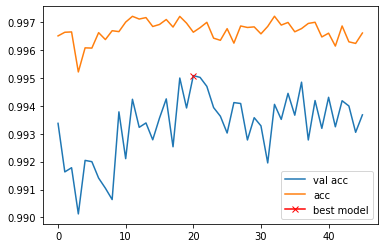

In [ ]:
plt.plot(result.history['val_accuracy'], label="val acc")
plt.plot(result.history['accuracy'], label="acc")
plt.plot(np.argmax(result.history["val_accuracy"]), np.max(result.history["val_accuracy"]), 
         marker="x", color="r", label="best model")
plt.legend()
plt.show()

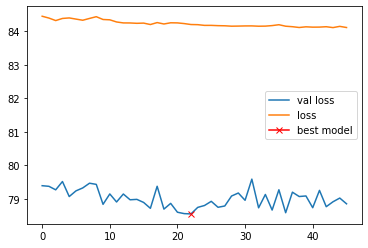

In [ ]:
plt.plot(result.history['val_loss'], label="val loss")
plt.plot(result.history['loss'], label="loss")
plt.plot(np.argmin(result.history["val_loss"]), np.min(result.history["val_loss"]), 
         marker="x", color="r", label="best model")
plt.legend()
plt.show()

In [ ]:
path_image_test = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(path,"Embryo","*"))}

df['path_image_test'] = df['id'].map(path_image_test.get)

In [ ]:
x_test = []
segmented = []
for i in range(len(df)):
  imgX = cv2.imread(df['path_image_test'][i])
  imgX = cv2.resize(imgX,(IMG_WIDTH,IMG_HEIGHT))
  x_test.append(imgX)
  segmented.append(imgX)

Menampilkan output dari masing-masing layer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


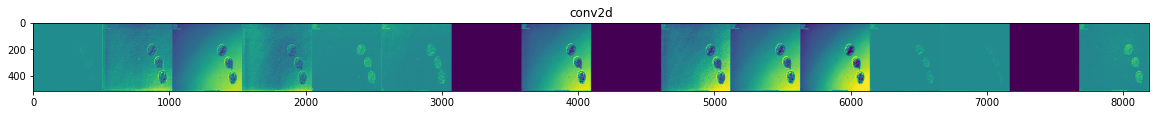

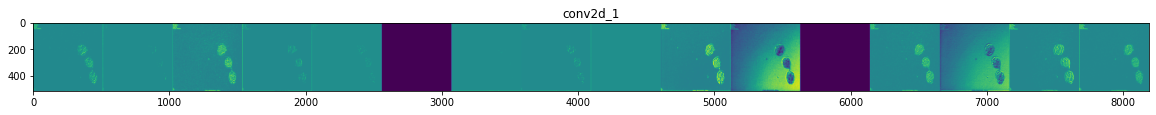

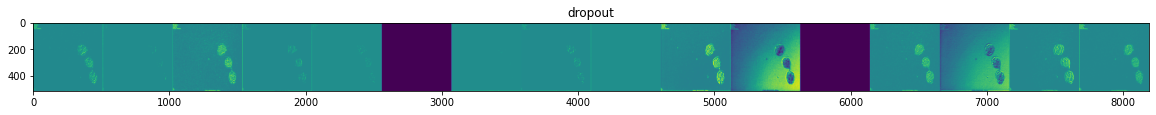

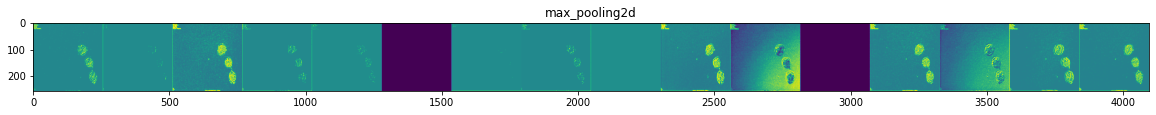

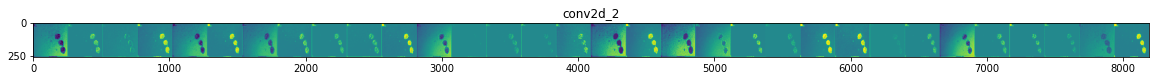

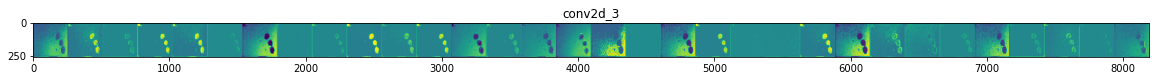

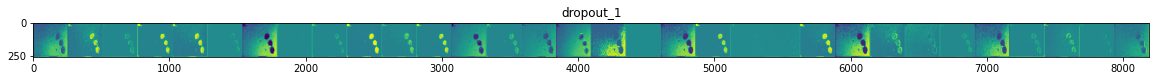

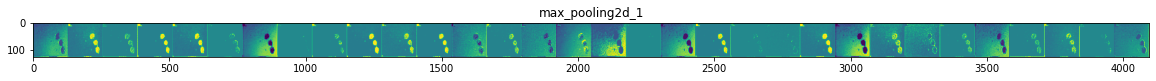

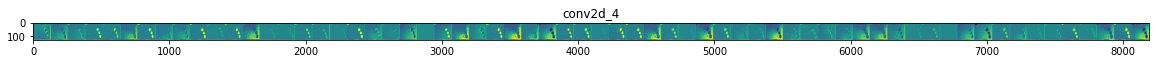

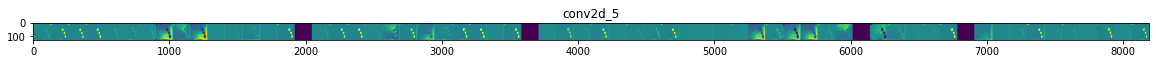

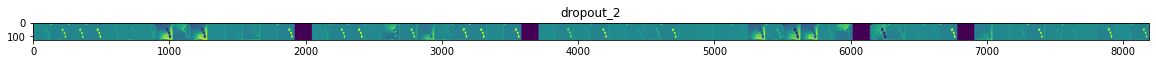

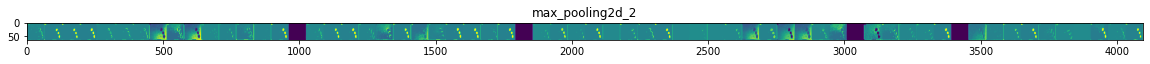

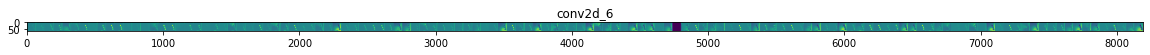

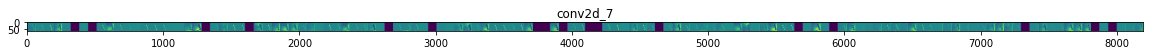

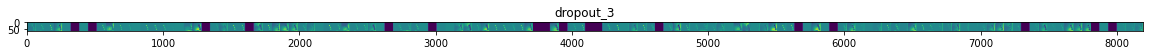

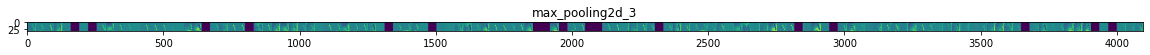

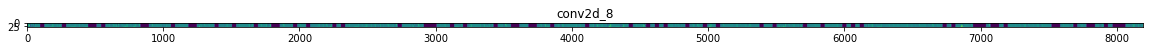

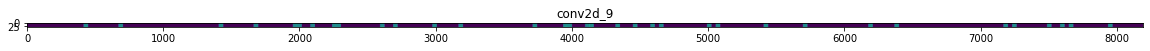

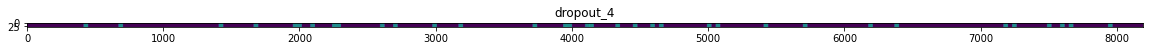

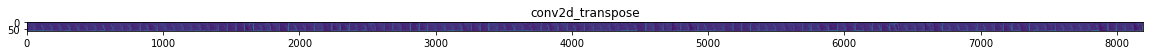

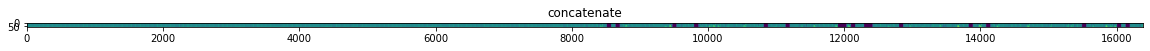

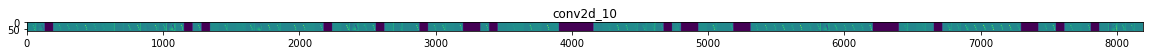

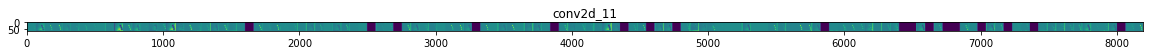

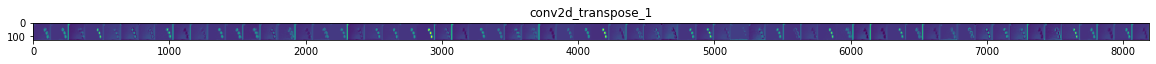

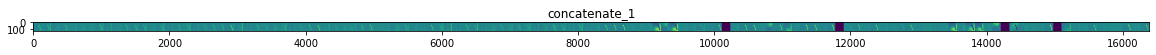

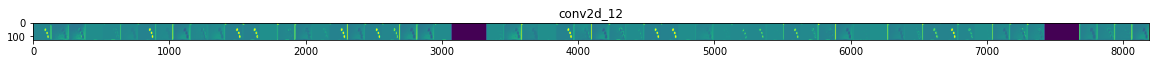

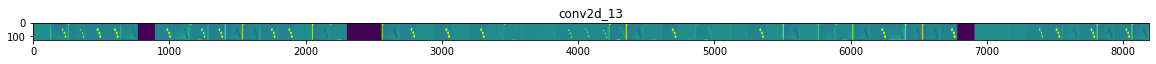

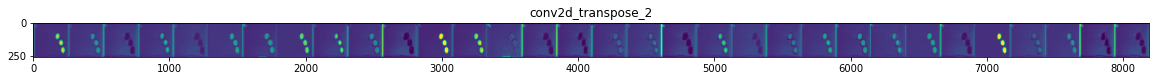

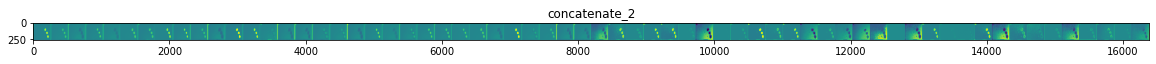

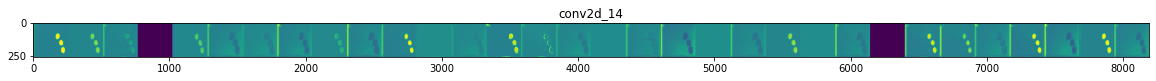

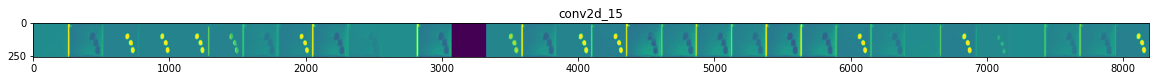

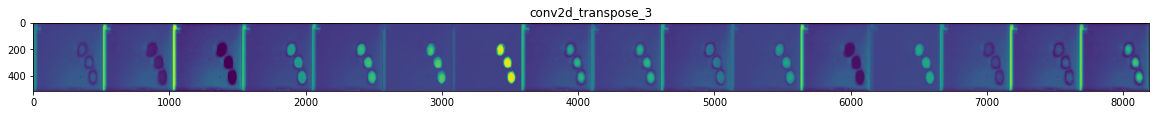

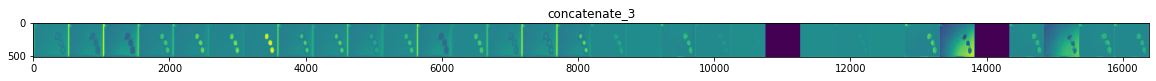

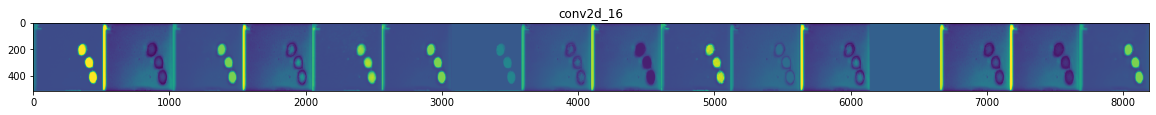

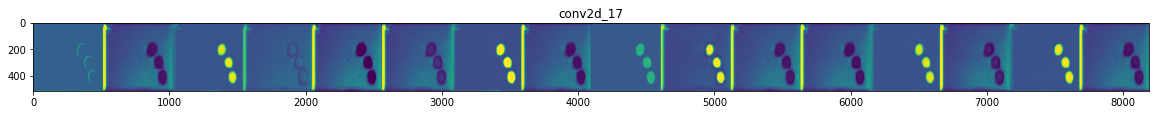

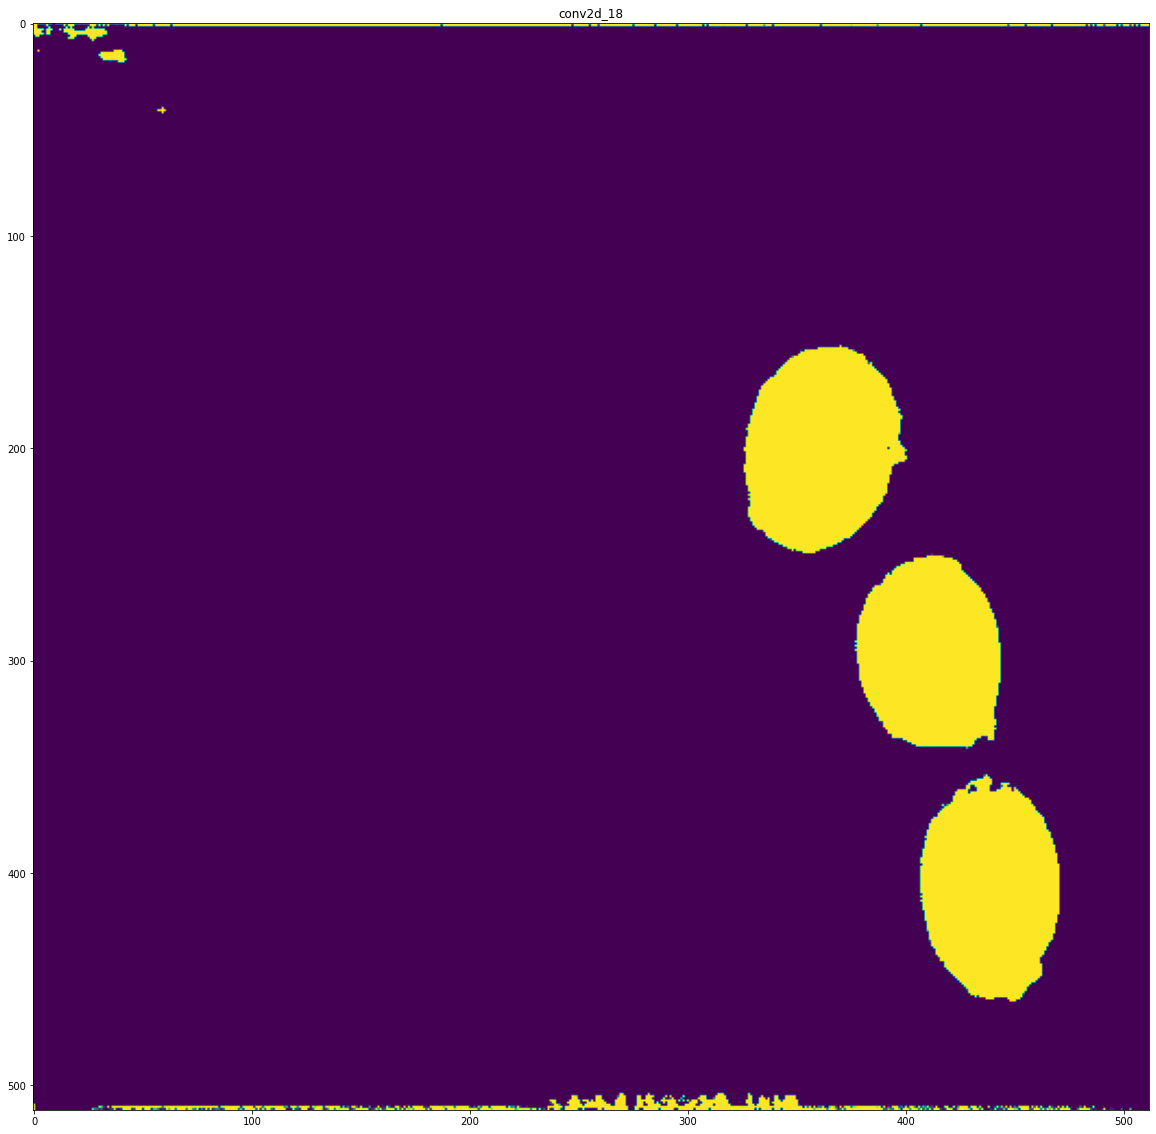

In [ ]:
layer_outputs = [layer.output for layer in model.layers[1:]]
visual_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

x = x_test[0].copy()
x = x.reshape((1,) + x.shape)

feature_maps = visual_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]


for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  
        size = feature_map.shape[1] 
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
x_test = np.asarray(x_test)
x_test = x_test/255

Predict Data Test

In [ ]:
predict_test = model.predict(x_test,verbose=1)

11/11 [==============================] - 3s 312ms/step


In [ ]:
predict_test_t=(predict_test>0.5).astype(np.uint8)

In [ ]:
for i in range(x_test.shape[0]):
  for j in range(x_test.shape[1]):
    for k in range(x_test.shape[2]):
      if predict_test_t[i][j,k] < 0.5 :
        segmented[i][j,k] = predict_test_t[i][j,k]

Text(0.5, 0, 'Citra yang tersegmentasi diubah menjadi Citra Asli')

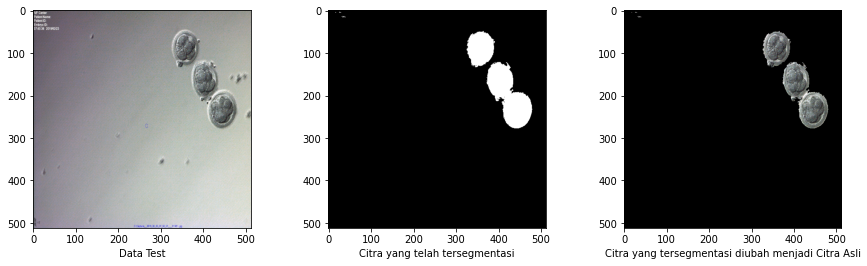

In [ ]:
no = 2
n=3
fig_width =5*n
fig, ax = plt.subplots(1, n)
fig. set_figwidth(fig_width)

ax[0].imshow(x_test[no])
ax[0].set_xlabel('Data Test')
ax[1].imshow(np.squeeze(predict_test_t[no]),cmap='gray')
ax[1].set_xlabel('Citra yang telah tersegmentasi')
ax[2].imshow(segmented[no],cmap='gray')
ax[2].set_xlabel('Citra yang tersegmentasi diubah menjadi Citra Asli')


Cropping citra yang telah tersegmentasi

In [ ]:
cropped = []
croppedResize = []
for n in range(len(x_test)):
  image = segmented[n].copy()
  contours, hierarchy = cv2.findContours(predict_test_t[n], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  idx = 0
  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if w>50 and h>50:
      idx+=1
      new_img=image[y:y+h,x:x+w]
      new_img = np.asarray(new_img)
      new_img2 = cv2.resize(new_img,(256,256))
      new_img = cv2.resize(new_img,(int(new_img.shape[1]*2.75),int(new_img.shape[0]*2.0625)))
      cropped.append(new_img)
      croppedResize.append(new_img2)

In [ ]:
cropped = np.asarray(cropped)
croppedResize = np.asarray(croppedResize)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
listDelete = []
for i in range(len(cropped)):
  if (cropped[i].shape[0] < 256) and (cropped[i].shape[1] < 256):
    cropped[i] = np.pad(cropped[i], ((int((256-cropped[i].shape[0])/2),int((256-cropped[i].shape[0])/2)),
                                    (int((256-cropped[i].shape[1])/2),int((256-cropped[i].shape[1])/2)),
                                    (0, 0)), 'constant')
    if cropped[i].shape[0]!=256 and cropped[i].shape[1]!=256:
      cropped[i] = np.pad(cropped[i], ((1,0),(1,0),(0,0)), 'constant')
    elif cropped[i].shape[0]!=256:
      cropped[i] = np.pad(cropped[i], ((1,0),(0,0),(0,0)), 'constant')
    elif cropped[i].shape[1]!=256:
      cropped[i] = np.pad(cropped[i], ((0,0),(1,0),(0,0)), 'constant')
  else :
    listDelete.append(i)
    i = i+1

Membuang data yang tidak sesuai

In [ ]:
cropped = np.delete(cropped, listDelete)

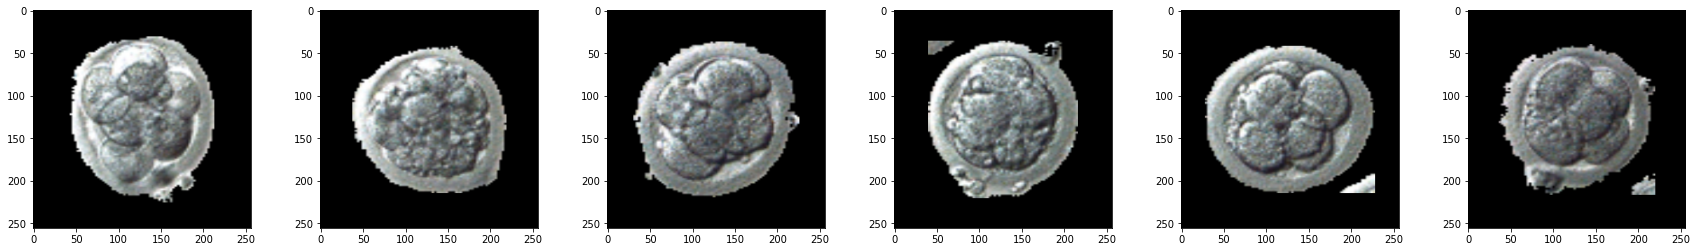

In [ ]:
n=6
fig_width =5*n
fig, ax = plt.subplots(1, n)
fig. set_figwidth(fig_width)

for i in range(n):
  ax[i].imshow(cropped[i])

In [ ]:
print(cropped.shape)
print(croppedResize.shape)

(595,)
(609, 256, 256, 3)


Membuat direktori untuk menyimpan citra

In [ ]:
directoryCrop = "../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/Skripsi"
directoryResizeCrop = "../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/SkripsiResize"
os.makedirs(directoryCrop, exist_ok=True)
os.makedirs(directoryResizeCrop, exist_ok=True)

Menyimpan citra ke dalam direktori

In [ ]:
for i in range(len(cropped)):
    cv2.imwrite(directoryCrop + '/' + str(i) + ".jpg", cropped[i])

In [ ]:
for j in range(len(croppedResize)):
    cv2.imwrite(directoryResizeCrop + '/' + str(j) + ".jpg", croppedResize[j])